In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram, plot_state_city
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import numpy as np
from math import *

{'0 1': 550, '1 0': 225, '0 0': 249}


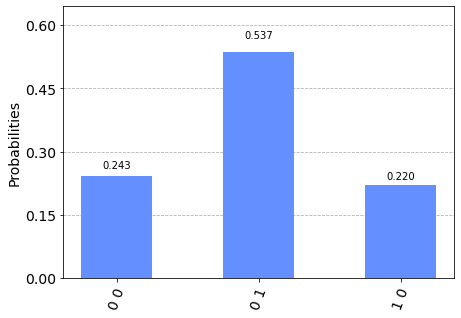

In [2]:
q = QuantumRegister(4)
out = ClassicalRegister(1, "out")
co = ClassicalRegister(1, "co")
qc = QuantumCircuit(q, out, co, name="fulladder")

qc.h(q[1]) # A
qc.h(q[2]) # B

qc.ccx(q[1],q[2],q[3])
qc.cx(q[1],q[2])
qc.ccx(q[0],q[2],q[3])
qc.cx(q[0],q[2])

qc.measure(q[2], out[0])
qc.measure(q[3], co[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

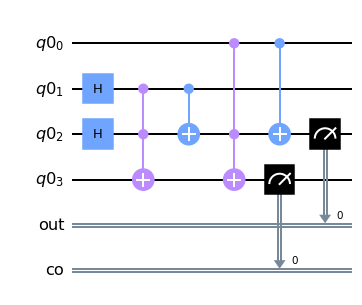

In [3]:
qc.draw(output='mpl')

In [36]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

/usr/local/lib/python3.5/dist-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

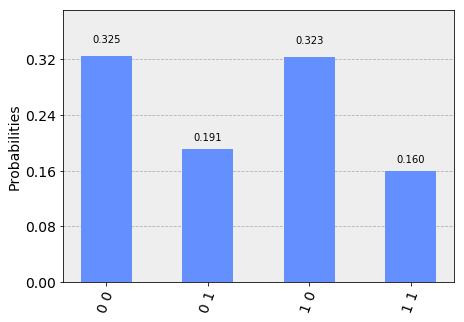

In [21]:
job_get=backend.retrieve_job('5ccb9eeb6443ec007394bef7')
rcounts = job_get.result().get_counts(qc)
plot_histogram(rcounts)

In [37]:
api = IBMQuantumExperience(token)
api.get_my_credits()

{'maxUserType': 15, 'promotional': 0, 'remaining': 12}

In [29]:
#api.get_last_codes()

In [38]:
api.get_jobs()

[{'backend': {'name': 'ibmq_qasm_simulator'},
  'calibration': {},
  'creationDate': '2019-05-04T03:28:47.063Z',
  'deleted': False,
  'endDate': '2019-05-04T03:28:47.318Z',
  'id': '5ccd06ef9bfaab0074c5caa8',
  'ip': {'city': 'Convento da Penha',
   'continent': 'South America',
   'country': 'Brazil',
   'ip': '177.158.48.174'},
  'kind': 'q-object',
  'maxCredits': 10,
  'qObject': {'config': {'max_credits': 10,
    'memory': False,
    'memory_slots': 2,
    'n_qubits': 4,
    'shots': 1024},
   'experiments': [{'config': {'memory_slots': 2, 'n_qubits': 4},
     'header': {'clbit_labels': [['out', 0], ['co', 0]],
      'compiled_circuit_qasm': 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q6[4];\ncreg out[1];\ncreg co[1];\nh q6[2];\nh q6[1];\nccx q6[1],q6[2],q6[3];\ncx q6[1],q6[2];\nccx q6[0],q6[2],q6[3];\ncx q6[0],q6[2];\nmeasure q6[2] -> out[0];\nmeasure q6[3] -> co[0];\n',
      'creg_sizes': [['out', 1], ['co', 1]],
      'memory_slots': 2,
      'n_qubits': 4,
      'name': 'ful